Развернуть нейросеть для построения карты глубины - на принципе стереозрения (при наличии двух камер) или монокульярного зрения (с одной камерой). Результат работы - по видео/фото или видеопотоку строится карта глубины.  

In [6]:
import cv2
import numpy as np
import torch
from torchvision.transforms import Compose, Normalize, ToTensor, Resize
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
torch.hub.help("intel-isl/MiDaS", "DPT_BEiT_L_384", force_reload=True)  # Triggers fresh download of MiDaS repo

Downloading: "https://github.com/intel-isl/MiDaS/zipball/master" to C:\Users\User/.cache\torch\hub\master.zip


' # This docstring shows up in hub.help()\n    MiDaS DPT_BEiT_L_384 model for monocular depth estimation\n    pretrained (bool): load pretrained weights into model\n    '

In [3]:
repo = "isl-org/ZoeDepth"
# Zoe_N
model_zoe_n = torch.hub.load(repo, "ZoeD_N", pretrained=True)

Using cache found in C:\Users\User/.cache\torch\hub\isl-org_ZoeDepth_main


img_size [384, 512]


Using cache found in C:\Users\User/.cache\torch\hub\intel-isl_MiDaS_master
C:\Users\User\Desktop\rock_team\venv\lib\site-packages\torch\functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:4316.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Params passed to Resize transform:
	width:  512
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_N.pt
Loaded successfully


In [4]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
zoe = model_zoe_n.to(DEVICE)

image = Image.open("image.jpg").convert("RGB")  # load
depth_pil = zoe.infer_pil(image, output_type="pil")  # as 16-bit PIL Image

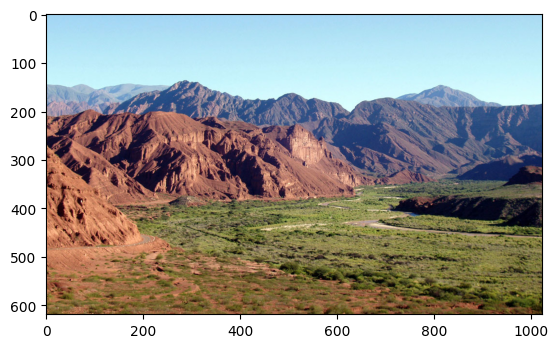

In [8]:
plt.imshow(image)
plt.show()

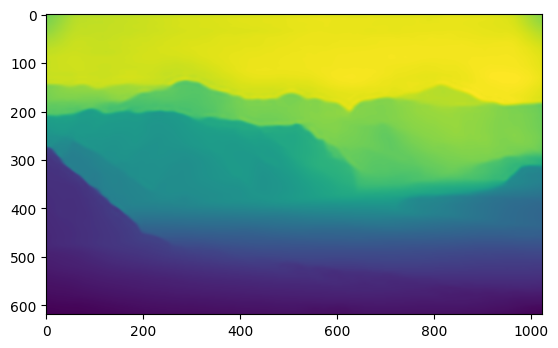

In [7]:
plt.imshow(depth_pil)
plt.show()